## 코사인 유사도 ( Cosine Similarity )
- 문서(텍스트)간에 유사도를 측정할 때 사용
- 벡터간에 유사도를 비교할때, 두 벡터간의 사이각을 구해서 얼마나 유사한지 수치로 나타냄
- 벡터 방향이 비슷할수록, 두 벡터는 유사하며, 사이각이 90도일때는 관련이 없는것, 사이각이 180도일때는 완전 반대인 관계를 나타낸다.

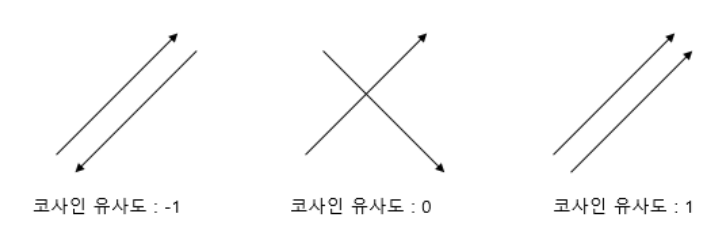

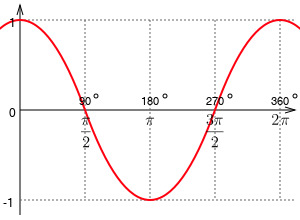

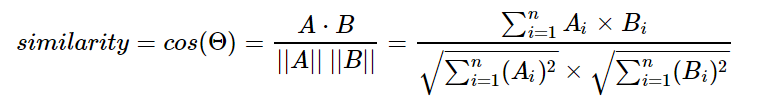

- 문서간에 유사도를 측정할 때, 유클리드 거리 구하는 방식으로 접근할 수 있지만, 희소 행렬에서 그렇게 접근하면 유사도 지표가 떨어진다.


In [1]:
import numpy as np

In [11]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

print(feature_vect_simple.shape)
print(type(feature_vect_simple))

(3, 18)
<class 'scipy.sparse.csr.csr_matrix'>


In [13]:
feature_vect_dense = feature_vect_simple.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


In [15]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
